# 🎧 How To Create Your Own Customized Spotify Playlist 🎵

This code will allow you to make a playlist of songs that you might like from an existing playlist. It will specifically use a classification model based that will learn your taste in music based off a playlist of songs that you like and dislike. 

**It is important to note that the playlists must be public for you to be able to pull data from it.**

# Overview of Steps to Follow for this Project

1. Import API Keys
2. Find two playlists (of Songs you Like/Dislike)
3. Create a CSV of these playlists that will comprise of features of the songs 
4. Create histograms/correlation maps to better understand the songs on the playlists
5. Merge the two playlists along a target variable that will identify the songs you like and dislike
6. Clean the playlist dataframe by removing unnecessary columns
7. Change variable types in order to run a predictive model 
8. Create numerous classification models that will predict the songs you like/dislike
9. Run accuracy measures to see which model can best predict
10. Choose one last random playlist that you will be using the predicitive model on 
11. Generate a list of recommended songs from the playlist
12. Play some of these recommended songs !

Done :D

# Packages & Libraries 

This is a list of packages and libraries you will need to execute this code. 

In [32]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import spotipy.util as util
sp = spotipy.Spotify() 

import random

# Getting Started With Your Spotify API

Spotify provides users with a free personal API key that allows you to pull data from your Spotify account, like your playlists. Within those playlists you can pull audio features about those songs like their danceability, energy, loudness, etc.

In order to obtain your personal API keys, you must first create an account at
Spotify for Deleveopers using the following 
link: https://developer.spotify.com/

After creating an account, you will be given a Client ID and a Client Secret ID, which will be used in the code below to both access and authenticate your account. 

In [33]:
SECRET_ID = str(input())
SECRET_ID2 = str(input())

client_id = SECRET_ID 
client_secret = SECRET_ID2 

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) # Spotify object to access API

After accessing your specific Spotify account through the API keys, you can now successfully look at songs, playlists, etc. from Spotify.

So the next step of the project will consist of pulling data from your very own spotify playlists. You will, of course, want to use a playlist consisting of only songs that you like, dislike, and want to search through.

Once you've found a playlist that you like, dislike, and wish to search through, you will need the following two items: user_ID and playlist_ID. These can both be found using the URLs as shown below for reference.

https://open.spotify.com/playlist/{playlist_ID}

https://open.spotify.com/user/{user_ID}

Create DataFrame 1 - Playlist IDs and Names:

After getting the two IDs, you can use the function below, which will extract information such as names, IDs, and popularity from songs within the playlist to create a data frame. There are numerous other song characteristics to choose from, so you can access other traits using:

https://spotipy.readthedocs.io/en/latest/

In [34]:
def playlist_trackID(user_ID,playlist_ID):
    """
    This function will take a playlist ID and a user's ID and return a Pandas DataFrame of the song's features within that playlist 
    """
    track_id = []
    popularity = []
    artist_name = []
    track_name = []
    playlist = sp.user_playlist_tracks(user_ID,playlist_ID)
    for song in playlist['items']:
        track = song['track']
        track_id.append(track['id'])
        popularity.append(track['popularity'])
        track_name.append(track['name'])
        artist_name.append(track['artists'][0]['name'])
    return pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})

Create DataFrame 2 - Playlist Audio Features:

After pulling more of the general information about the songs on the playlists, you will need to use Spotify's sp.audio_features() to grab even more characteristics about the songs such as energy, loudness, etc. into another separate dataframe. The full list of audio features can be found here: 
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/. 

In [36]:
def get_audio_features(dataframe_name):
    """
    Pulling all of the audio features of a song into a list and then into a dataframe
    """
    afeatures = []
    number = len(dataframe_name)
    for i in range(0,len(dataframe_name['track_id']),number):
        batch = dataframe_name['track_id'][i:i+number]
        audio_features = sp.audio_features(batch)
        for i, t in enumerate(audio_features):
            afeatures.append(t)
    return pd.DataFrame.from_dict(afeatures,orient='columns')

Merging DataFrames:
 
Now that you have the audio features as well as artist name and track name and ID of each song in your playlist, you will need to merge the two dataframes. After merging, you will also want to remove some of the unnecessary columns that will not be very useful for the predictive model.

The merge of the dataframes must be made on a shared variable, using inner join. That variable would be track_id and id. You need to rename the variable name again as Python is case sensitive.

In [37]:
def merge_dataframes(dataframe1,dataframe2):
    drop_columns = ['analysis_url','track_href','type']
    dataframe2.drop(drop_columns,axis=1,inplace=True)
    dataframe2.rename(columns={'id': 'track_id'}, inplace=True)
    return pd.merge(dataframe1,dataframe2,on='track_id',how='inner')

In [38]:
username_id1 = str(input())
playlist_id1 = str(input())

first_dataframe_user = playlist_trackID(username_id1,playlist_id1)
second_dataframe_user = get_audio_features(first_dataframe_user)
final_dataframe_user = merge_dataframes(first_dataframe_user,second_dataframe_user)
final_dataframe_user.to_csv('Good_Spotify.csv')

bonshaun
4UvloiH1vPUqvDvIOt7Wm8


In [39]:
username_id2 = str(input())
playlist_id2 = str(input()) 

first_dataframe_user = playlist_trackID(username_id2, playlist_id2)
second_dataframe_user = get_audio_features(first_dataframe_user)
final_dataframe_user = merge_dataframes(first_dataframe_user,second_dataframe_user)
final_dataframe_user.to_csv('Bad_Spotify.csv')

alaskanbullworm8
07jaITMGGL6QYmT8yZVxQt


Using the user's ID and playlist ID we can create CSV files of their selected playlists that include the track ID, track name, and audio features. You will need a "bad" playlist, a list of songs that you dislike, and a "good" playlist, a list of songs that you do like, as well as a final playlist that you want to search through to pull songs from to make your customized playlist. 

# Data Pre-Processing

In this section we will 

... add a target variable to the playlists.

... merge the two playlists.

... explore the characteristics of the two playlists and songs within, using correlation maps and histograms. 

... clean the data by removing some columns.

... change the variable types in order to run the predictive model on it. 

Adding a Target Variable:

Now that we have our CSV files for our "good" and "bad" playlist from the section above, we need to add "targets" so that we can distinguish between the songs that we like and the songs that we dislike. We have used 1 to distinguish songs that we like and 0 to distinguish that songs that we dislike.   

In [40]:
def good_playlist(good_playlist_csv):
    """
    Making a new column in the data frame called 'Target' that classifies the songs you like as 1
    good: playlist of songs that you like 
    """
    good = pd.read_csv(good_playlist_csv)
    target = 1
    good['target'] = target
    return good

good_playlist('Good_Spotify.csv')

,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature,target
0,0,American Authors,Best Day Of My Life,5j9iuo3tMmQIfnEEQOOjxh,18,0.670,0.905,2,-2.385,1,0.0339,0.06250,0.000151,0.0577,0.516,100.021,spotify:track:5j9iuo3tMmQIfnEEQOOjxh,194240,4,1
1,1,The Killers,Mr. Brightside,7oK9VyNzrYvRFo7nQEYkWN,78,0.356,0.924,1,-3.740,1,0.0808,0.00101,0.000000,0.0953,0.232,148.017,spotify:track:7oK9VyNzrYvRFo7nQEYkWN,222587,4,1
2,2,Maroon 5,Makes Me Wonder,1lHXlGlve5Zx8tXLhyjDwM,59,0.803,0.851,7,-2.429,1,0.0357,0.00485,0.000358,0.0577,0.881,113.996,spotify:track:1lHXlGlve5Zx8tXLhyjDwM,211080,4,1
3,3,OMI,Cheerleader (Felix Jaehn Remix) - Radio Edit,6fQcqEcXfnY0L6VwS0c3gT,62,0.827,0.576,4,-7.774,1,0.0372,0.18400,0.029000,0.0656,0.410,118.040,spotify:track:6fQcqEcXfnY0L6VwS0c3gT,180021,4,1
4,4,Justin Bieber,What Do You Mean?,1ds2QsfhAAfRiaFMGDzrdb,10,0.842,0.564,5,-8.042,0,0.1050,0.61700,0.000240,0.0912,0.782,124.984,spotify:track:1ds2QsfhAAfRiaFMGDzrdb,207547,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Bruno Mars,Versace On The Floor,3trg82Eql6tqi2EAxluhy8,65,0.578,0.574,2,-6.209,1,0.0454,0.19600,0.000000,0.0830,0.301,174.152,spotify:track:3trg82Eql6tqi2EAxluhy8,261240,4,1
96,96,Lady Gaga,Million Reasons,50PWlIBU7PlGGwzgN8TiFJ,18,0.668,0.449,0,-7.897,1,0.0451,0.47700,0.000000,0.1070,0.154,129.889,spotify:track:50PWlIBU7PlGGwzgN8TiFJ,205280,4,1
97,97,Alessia Cara,"How Far I'll Go - From ""Moana""",5hYTyyh2odQKphUbMqc5gN,18,0.314,0.555,9,-9.601,1,0.3700,0.15700,0.000108,0.0670,0.159,179.666,spotify:track:5hYTyyh2odQKphUbMqc5gN,175517,4,1
98,98,Ed Sheeran,Lego House,53Pgsvu3qSYO2aXt5J2vcL,61,0.592,0.637,11,-8.480,1,0.0992,0.56200,0.000000,0.1300,0.565,159.701,spotify:track:53Pgsvu3qSYO2aXt5J2vcL,185093,4,1


In [41]:
def bad_playlist(bad_playlist_csv):
    """
    Making a new column in the data frame called 'Target' that classifies the songs you dislike as 0
    bad: playlist of songs that you dislike
    """
    bad = pd.read_csv(bad_playlist_csv)
    target = 0
    bad['target'] = target
    return bad 

bad_playlist('Bad_Spotify.csv')

,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature,target
0,0,Avenged Sevenfold,Shepherd of Fire,1fQaoh3imrMunWVZh5kf90,69,0.576,0.906,2,-7.677,1,0.0571,0.000332,0.061400,0.0908,0.2110,127.935,spotify:track:1fQaoh3imrMunWVZh5kf90,323800,4,0
1,1,Avenged Sevenfold,This Means War,2NImo2MajNai4CLk35wMut,64,0.614,0.914,7,-5.590,0,0.0324,0.000554,0.000012,0.0371,0.4390,90.000,spotify:track:2NImo2MajNai4CLk35wMut,369293,4,0
2,2,Avenged Sevenfold,Nightmare,4UEo1b0wWrtHMC8bVqPiH8,73,0.554,0.949,2,-4.928,1,0.0787,0.000318,0.000100,0.2000,0.2330,129.984,spotify:track:4UEo1b0wWrtHMC8bVqPiH8,374453,4,0
3,3,Avenged Sevenfold,Hail to the King,5anCkDvJ17aznvK5TED5uo,76,0.580,0.916,3,-4.358,0,0.0387,0.000297,0.025900,0.1260,0.6830,118.004,spotify:track:5anCkDvJ17aznvK5TED5uo,305907,4,0
4,4,Avenged Sevenfold,I Won't See You Tonight Part 1,0X0fvHVXgFX8413g1dcn6Y,54,0.388,0.719,7,-5.109,0,0.0491,0.000456,0.005950,0.2180,0.1020,129.839,spotify:track:0X0fvHVXgFX8413g1dcn6Y,538333,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Metallica,Wherever I May Roam,4zJLpLsfY52ih6y8u4mhKH,9,0.554,0.816,11,-7.871,1,0.0353,0.000526,0.000711,0.0988,0.3620,131.409,spotify:track:4zJLpLsfY52ih6y8u4mhKH,404240,4,0
96,96,Metallica,Metal Militia (Remastered),6yPJaDkXDkFU9YSzWl8wuD,43,0.166,0.956,9,-5.307,1,0.1450,0.000081,0.005150,0.1180,0.2380,176.217,spotify:track:6yPJaDkXDkFU9YSzWl8wuD,311467,4,0
97,97,Metallica,The Unforgiven III,6xcpkEEppRQOqmo5MWflyF,6,0.298,0.766,4,-3.485,0,0.0347,0.002030,0.000004,0.1170,0.0923,121.555,spotify:track:6xcpkEEppRQOqmo5MWflyF,466587,4,0
98,98,Metallica,Cyanide,2V6yO7x7gQuaRoPesMZ5hr,0,0.313,0.993,11,-0.463,0,0.0751,0.000119,0.000335,0.3030,0.4970,129.255,spotify:track:2V6yO7x7gQuaRoPesMZ5hr,399547,4,0


Correlation Map:

We will now create correlation maps for each playlist (our like and dislike playlist), which look at the relationship between the variables (audio features) and if they have high collinearity. If the variables have a high correlation, then we will want to delete one of the variables to ensure proper accuracy later. However, if they are not highly correlated, then we keep the variable. 

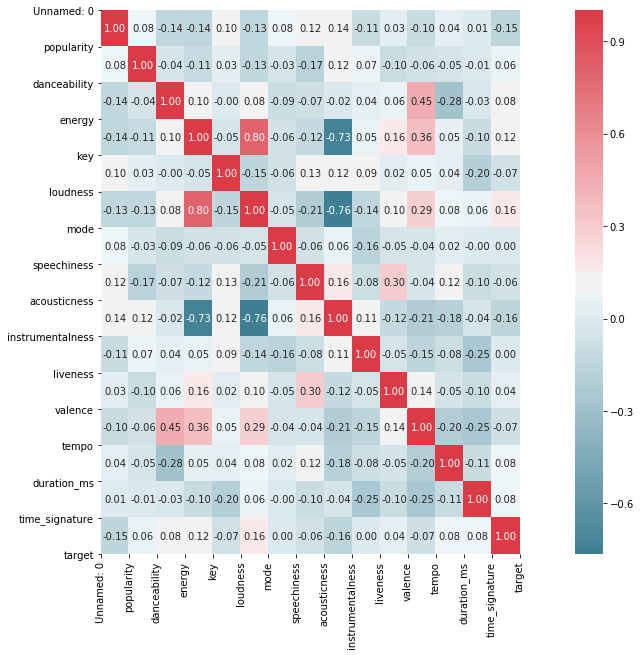

In [42]:
def correlation_map(df):
    """
    creates a correlation map to check for the relationships between variables
    """
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (10,10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(corr, cmap = colormap, annot = True, fmt = '.2f')
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()
    
correlation_map(good_playlist("Good_Spotify.csv"))

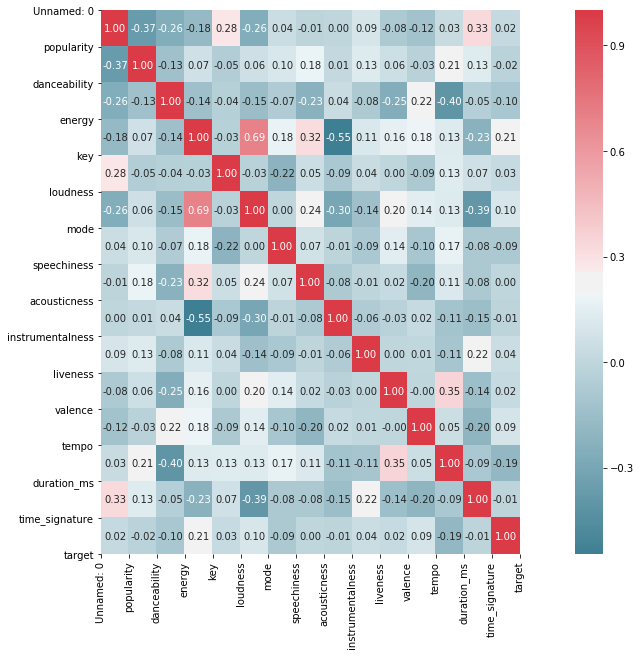

In [43]:
correlation_map(bad_playlist("Bad_Spotify.csv"))

As you can see from our correlation maps for both our liked songs playlist and disliked songs playlist, there is no highly correlated variables. Therefore, we do not remove any variables. 

Histograms:

Now, we will create histograms that look at the distribution within each audio feature in the playlists. Again, this is mainly to get a better understanding of the characteristics of the playlists that we will base our  model on. 

We set alpha to 0.7 so that it was more readable. 

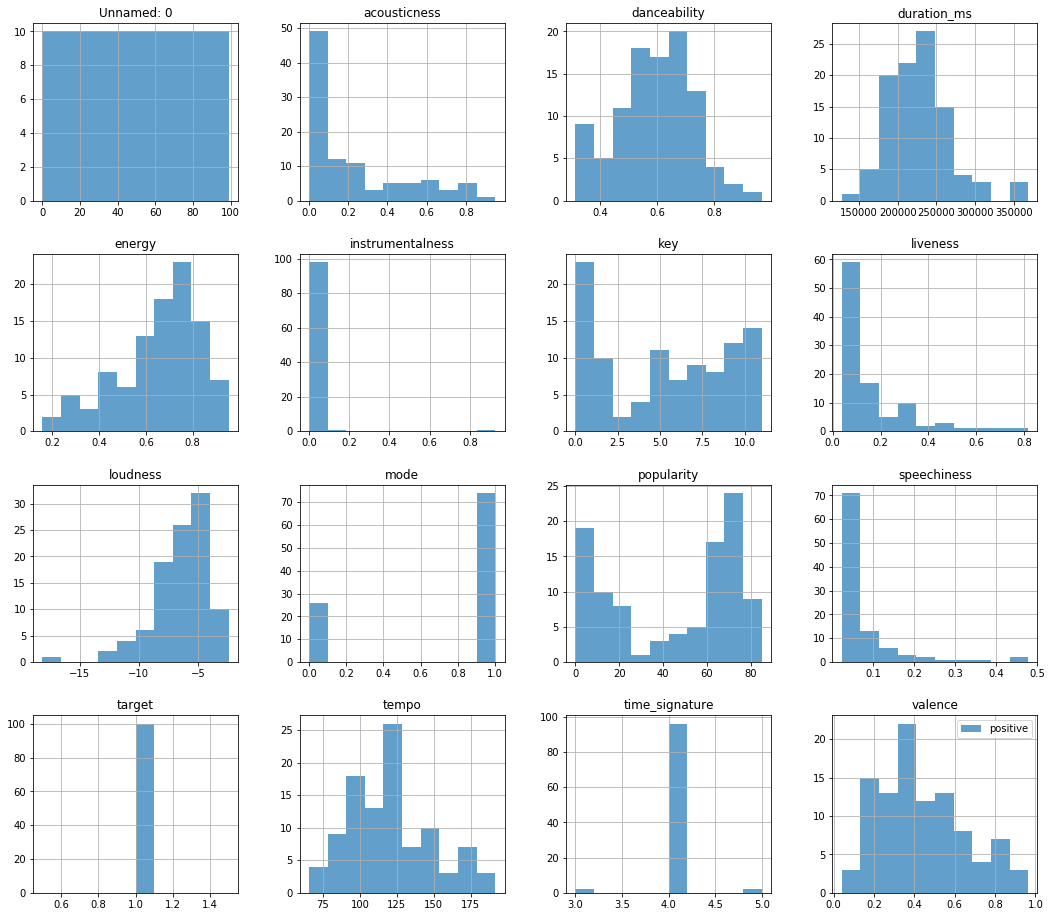

In [46]:
def good_hist(df):
    """
    creating histograms to look at the distribution of values within the audio features of the good playlist
    """
    good = good_playlist(df)
    good.hist(alpha = 0.7, label = 'positive', figsize = (18, 16))
    plt.legend(loc = 'upper right')
    return plt.show()

good_hist('Good_Spotify.csv')

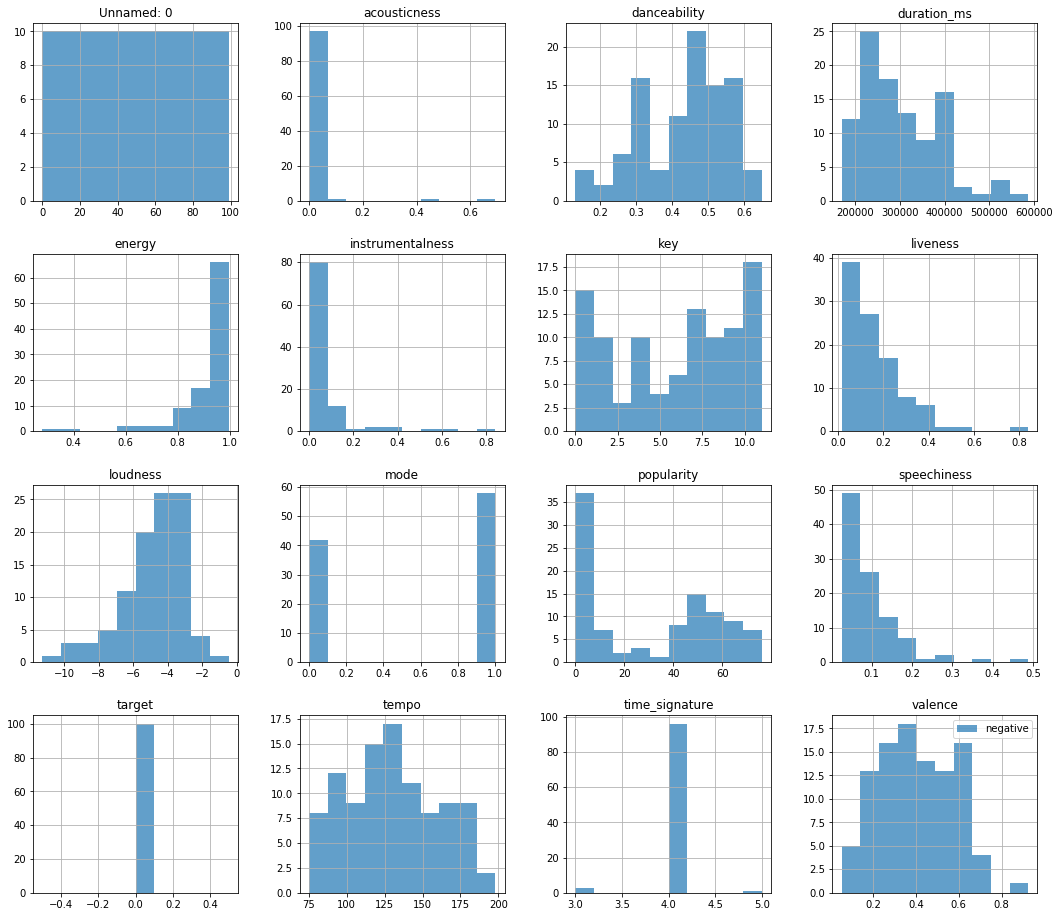

In [47]:
def bad_hist(df):
    """
    creating histograms to look at the distribution of values within the audio features of the bad playlist
    """
    bad = bad_playlist(df)
    bad.hist(alpha = 0.7, label = 'negative', figsize = (18, 16))
    plt.legend(loc = 'upper right')
    return plt.show()

bad_hist('Bad_Spotify.csv')

Merging the GOOD and BAD playlists:

We now need to combine the 2 playlists - liked songs and disliked songs, together into one dataframe so that we can run our prediction models in the next section. 

In [48]:
def one_playlist(df_1, df_2):
    """
    Combining the 'good' and 'bad' playlist into one dataframe
    """
    good = good_playlist(df_1)
    bad = bad_playlist(df_2)
    frames = [good, bad]
    combined = pd.concat(frames, sort = True)
    return combined
df_1 = 'Good_Spotify.csv'
df_2 = 'Bad_Spotify.csv'
one_playlist(df_1, df_2)

,Unnamed: 0,acousticness,artist_name,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,target,tempo,time_signature,track_id,track_name,uri,valence
0,0,0.062500,American Authors,0.670,194240,0.905,0.000151,2,0.0577,-2.385,1,18,0.0339,1,100.021,4,5j9iuo3tMmQIfnEEQOOjxh,Best Day Of My Life,spotify:track:5j9iuo3tMmQIfnEEQOOjxh,0.5160
1,1,0.001010,The Killers,0.356,222587,0.924,0.000000,1,0.0953,-3.740,1,78,0.0808,1,148.017,4,7oK9VyNzrYvRFo7nQEYkWN,Mr. Brightside,spotify:track:7oK9VyNzrYvRFo7nQEYkWN,0.2320
2,2,0.004850,Maroon 5,0.803,211080,0.851,0.000358,7,0.0577,-2.429,1,59,0.0357,1,113.996,4,1lHXlGlve5Zx8tXLhyjDwM,Makes Me Wonder,spotify:track:1lHXlGlve5Zx8tXLhyjDwM,0.8810
3,3,0.184000,OMI,0.827,180021,0.576,0.029000,4,0.0656,-7.774,1,62,0.0372,1,118.040,4,6fQcqEcXfnY0L6VwS0c3gT,Cheerleader (Felix Jaehn Remix) - Radio Edit,spotify:track:6fQcqEcXfnY0L6VwS0c3gT,0.4100
4,4,0.617000,Justin Bieber,0.842,207547,0.564,0.000240,5,0.0912,-8.042,0,10,0.1050,1,124.984,4,1ds2QsfhAAfRiaFMGDzrdb,What Do You Mean?,spotify:track:1ds2QsfhAAfRiaFMGDzrdb,0.7820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.000526,Metallica,0.554,404240,0.816,0.000711,11,0.0988,-7.871,1,9,0.0353,0,131.409,4,4zJLpLsfY52ih6y8u4mhKH,Wherever I May Roam,spotify:track:4zJLpLsfY52ih6y8u4mhKH,0.3620
96,96,0.000081,Metallica,0.166,311467,0.956,0.005150,9,0.1180,-5.307,1,43,0.1450,0,176.217,4,6yPJaDkXDkFU9YSzWl8wuD,Metal Militia (Remastered),spotify:track:6yPJaDkXDkFU9YSzWl8wuD,0.2380
97,97,0.002030,Metallica,0.298,466587,0.766,0.000004,4,0.1170,-3.485,0,6,0.0347,0,121.555,4,6xcpkEEppRQOqmo5MWflyF,The Unforgiven III,spotify:track:6xcpkEEppRQOqmo5MWflyF,0.0923
98,98,0.000119,Metallica,0.313,399547,0.993,0.000335,11,0.3030,-0.463,0,0,0.0751,0,129.255,4,2V6yO7x7gQuaRoPesMZ5hr,Cyanide,spotify:track:2V6yO7x7gQuaRoPesMZ5hr,0.4970


Removing Columns:

We need to remove the columns labeled "unnamed" from the dataframe because they are redundant and will not help in the predicitive model. We only need the audio features for each song as well as the artist name, song name, and track ID. 

In [49]:
def remove_col(df_1, df_2):
    """
    Deleting the unnecessary columns that label row IDs
    """
    combined = one_playlist(df_1, df_2)
    keep_col = ['artist_name', 'track_name', 'track_id', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'target']
    new_rr = combined[keep_col]
    return new_rr

remove_col(df_1, df_2)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,American Authors,Best Day Of My Life,5j9iuo3tMmQIfnEEQOOjxh,18,0.670,0.905,2,-2.385,1,0.0339,0.062500,0.000151,0.0577,0.5160,100.021,194240,4,1
1,The Killers,Mr. Brightside,7oK9VyNzrYvRFo7nQEYkWN,78,0.356,0.924,1,-3.740,1,0.0808,0.001010,0.000000,0.0953,0.2320,148.017,222587,4,1
2,Maroon 5,Makes Me Wonder,1lHXlGlve5Zx8tXLhyjDwM,59,0.803,0.851,7,-2.429,1,0.0357,0.004850,0.000358,0.0577,0.8810,113.996,211080,4,1
3,OMI,Cheerleader (Felix Jaehn Remix) - Radio Edit,6fQcqEcXfnY0L6VwS0c3gT,62,0.827,0.576,4,-7.774,1,0.0372,0.184000,0.029000,0.0656,0.4100,118.040,180021,4,1
4,Justin Bieber,What Do You Mean?,1ds2QsfhAAfRiaFMGDzrdb,10,0.842,0.564,5,-8.042,0,0.1050,0.617000,0.000240,0.0912,0.7820,124.984,207547,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Metallica,Wherever I May Roam,4zJLpLsfY52ih6y8u4mhKH,9,0.554,0.816,11,-7.871,1,0.0353,0.000526,0.000711,0.0988,0.3620,131.409,404240,4,0
96,Metallica,Metal Militia (Remastered),6yPJaDkXDkFU9YSzWl8wuD,43,0.166,0.956,9,-5.307,1,0.1450,0.000081,0.005150,0.1180,0.2380,176.217,311467,4,0
97,Metallica,The Unforgiven III,6xcpkEEppRQOqmo5MWflyF,6,0.298,0.766,4,-3.485,0,0.0347,0.002030,0.000004,0.1170,0.0923,121.555,466587,4,0
98,Metallica,Cyanide,2V6yO7x7gQuaRoPesMZ5hr,0,0.313,0.993,11,-0.463,0,0.0751,0.000119,0.000335,0.3030,0.4970,129.255,399547,4,0


Changing the Variable Type:

After removing the columns we now have a clean dataframe, which you can see in the example above. 


The variables within the dataframe are currently read as objects. However, in order to run our predictive models later on, we will need to change them to float. This can be done using the code below. 

In [50]:
def variable_type(df_1, df_2):
    """
    Changing Variable Types from object to numeric values
    """
    variable = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness","duration_ms"]
    for audio_feature in variable:
        new_rr = remove_col(df_1, df_2)
        new_rr[audio_feature] = pd.to_numeric(new_rr[audio_feature], errors = 'coerce')
    return new_rr.dtypes

variable_type(df_1, df_2)

artist_name          object
track_name           object
track_id             object
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
target                int64
dtype: object

# Prediction Models

This section of the code will build three prediction models using Decision Tree Classification, Random Forest Classifier, and KNN Classifier. The purpose of this section is to see which model will most accurately predict and understand the songs that we like and dislike from the other or independent variables. 

**Other classification models can be used to futher/change your analysis.

Training the Model:

Split the model into a training/testing set in order to train your model's predictive accuracy. The dependent variable, or variable to be predicted, of course will be the "Target" variable that we had created earlier. 

In [51]:
new_rr = remove_col(df_1, df_2)
random_seed = 5 # set random seed for reproducible results 
variables = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness","duration_ms"]
X = new_rr[variables] # using the variables we would like to use
y = new_rr["target"] # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_seed) # 80% training and 20% test


Building the Models:

Now, you can build your predictive models using the training set made. After, check the accuracy of predicted values against the actual values. 

In [52]:
def decision_tree():
    # Decision Tree Classification Model
    first_DT_clf = DecisionTreeClassifier() # Decision Tree classifier object
    first_DT_clf = first_DT_clf.fit(X_train, y_train) # train Decision Tree Classifier
    y_pred = first_DT_clf.predict(X_test) # predict the response for the test dataset
    
    # Decision Tree Model Accuracy
    accuracy = (accuracy_score(y_test, y_pred))
    print(f'Accuracy: {accuracy*100}%')
    
    # Decision Tree Classifier Confusion Matrix
    results = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix :')
    print(results)
    print('Report for Decision Tree Model : ')
    print(classification_report(y_test, y_pred))
decision_tree()

Accuracy: 90.0%
Confusion Matrix :
[[16  2]
 [ 2 20]]
Report for Decision Tree Model : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.91      0.91      0.91        22

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



We can see from the results above that the Decision Tree Model has an accuracy of 90%.

In [53]:
def random_forest():
    # Random Forest Tree Model
    RF_CLF = RandomForestClassifier()
    RF_CLF.fit(X_train, y_train)
    RF_pred = RF_CLF.predict(X_test)
    
    # Random Forest Model Accuracy
    accuracy_RF = (accuracy_score(y_test, RF_pred))
    print(f'Accuracy: {accuracy_RF*100}%')
    
    # Random Forest Tree Model Confusion Matrix
    results = confusion_matrix(y_test, RF_pred)
    print('Confusion Matrix :')
    print(results)
    print('Report for Random Forest Model : ')
    print(classification_report(y_test, RF_pred))
random_forest()

Accuracy: 97.5%
Confusion Matrix :
[[18  0]
 [ 1 21]]
Report for Random Forest Model : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        22

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



C:\Users\cngo1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


We can see from the results above that the Random Forest Model has an accuracy of 97.5%. 

In [54]:
def knn_model():
    # KNN Model
    knn = KNeighborsClassifier(3)
    knn.fit(X_train, y_train)
    first_DT_clf = DecisionTreeClassifier()
    first_DT_clf = first_DT_clf.fit(X_train, y_train) # train Decision Tree Classifier
    knn_pred = first_DT_clf.predict(X_test)
    
    # KNN Model Accuracy
    score = accuracy_score(y_test, knn_pred)*100
    print(f'Accuracy using KNN Tree: {round(score, 1)}%')
    
    # KNN Confusion Matrix
    results = confusion_matrix(y_test, knn_pred)
    print('Confusion Matrix :')
    print(results)
    print('Report for KNN Model : ')
    print(classification_report(y_test, knn_pred))
knn_model()

Accuracy using KNN Tree: 87.5%
Confusion Matrix :
[[15  3]
 [ 2 20]]
Report for KNN Model : 
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.87      0.91      0.89        22

    accuracy                           0.88        40
   macro avg       0.88      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40



Finally, we can see from the results above that the the KNN Tree Model has an accuracy of 87.5%.

After running these three prediction models, we have found that the Random Forest Classifier is the best model to use because of its high accuracy of 97.5%.

# Predicting Which Songs You Will Like

We know from the prediction models above that the Random Forest Classifier has the highest accuracy; therefore, we have chosen to use it as our final model for predicting songs! The model will not always be RFC, so make sure to change the code if another model has better prediciton skills or if you simply choose to utilize different models. 

Generating Recommended Songs:

Now you will want to take a random playlist of your choosing. From this, you can apply a model from the machine learning models earlier to filter through the songs to give you a list of songs that you may like! This will be you very own customized playlist!

In [55]:
client_id = SECRET_ID
client_secret = SECRET_ID2
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager) # Spotify object to access API

username_id3 = str(input())
playlist_id3 = str(input())

first_dataframe_spotify = playlist_trackID(username_id3, playlist_id3)
second_dataframe_spotify = get_audio_features(first_dataframe_spotify)
final_dataframe_spotify = merge_dataframes(first_dataframe_spotify,second_dataframe_spotify)

def recc_songs(daf_1, daf_2, daf_3):
    new_rr = remove_col(daf_1, daf_2)
    random_seed = 5 #set random seed for reproducible results 
    variables = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness","duration_ms"]
    X = new_rr[variables] #using the variables we would like to use 
    y = new_rr["target"] #target variable 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed) # 80% training and 20% test
    RF_CLF = RandomForestClassifier()
    RF_CLF.fit(X_train, y_train)
    pred = RF_CLF.predict(daf_3[variables])
    likedSongs = 0
    i = 0   
    artist_name = []
    track_id = []
    track_name =[]
    track_uri = []
    for prediction in pred:
        if(prediction == 1):
            artist_name.append(daf_3["artist_name"][i])
            track_id.append(daf_3["track_id"][i])
            track_name.append(daf_3["track_name"][i])
            track_uri.append(daf_3["uri"][i])
            # print ("Song: " + final_dataframe_spotify["track_name"][i] + ", By: "+ final_dataframe_spotify["artist_name"][i])
            likedSongs= likedSongs + 1
        i = i +1
    return pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'track_uri':track_uri})

reccy_songs=recc_songs(df_1,df_2,final_dataframe_spotify)
print(reccy_songs)
reccy_songs.to_csv("Reccy.csv")

22cqaggevdimh2ljk22cgbgua
0ZBGoSsfyxnDUWqpGKNsn5
           artist_name                                         track_name  \
0                 RINI                               My Favourite Clothes   
1           Rich Brian                                         Drive Safe   
2                Bazzi                                           I.F.L.Y.   
3   Tyler, The Creator                   See You Again (feat. Kali Uchis)   
4            Lil Wayne                                               Mess   
..                 ...                                                ...   
94                RINI                                             Camped   
95         Lasse Lindh  Hush (From Guardian [Original Television Sound...   
96            CHANYEOL                                       Stay With Me   
97                LANY                                                 13   
98         Jeff Bernat                                              Cruel   

                  track_id

C:\Users\cngo1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


🔊 After generating the recommended list of songs, let's try to play some of these songs. The function below uses a HTML formatted code that will randomly play a song from your recommended list. 

In [62]:
from IPython.display import IFrame, HTML

def spotify_player(playlist):
    '''
    chooses a random song from the playlist of recommended songs and generates a live clip of the song
    '''
    randomnumber = random.randint(0,98)
    src_id =''
    for track in playlist:
        src_id = playlist['track_id'][randomnumber]
        open_play = "https://open.spotify.com/embed/track/"+src_id
    return IFrame(src=open_play, width = '300', height ='80')

spotify_player(reccy_songs)


# For the Future ...

It was great to get the list of recommended songs. But, it would be even better if we could insert the recommnded playlist directly onto Spotify! 



In [2]:
# CODE <WORK IN PROGRESS>

# ##this is adding onto an empty public playlist that the user has already created and adding onto it using the track IDs of the above mentioned tracks in the dataframes 

# def add_playlist():
#     sp.user_playlist_add_tracks("user_ID", "playlist_ID", playlist['track_id'])

# References

These are the source codes we used to create our project:

https://towardsdatascience.com/making-your-own-discover-weekly-f1ac7546fedb

https://github.com/nab0310/SpotifyML/blob/master/spotify/Final%20Pretty%20Spotify%20Data%20Classifier.ipynb
